## Import Modules

In [56]:
#import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
data = pd.read_csv("C:/Users/dell/Documents/DSN data science/Social_Network_Ads.csv", delimiter = ',')

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [58]:
data['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [59]:
data['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

## Pre-processing Data

In [60]:
#creating a labelEncoder object
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#invoking fit_transform method on object
data['Gender'] = le.fit_transform(data['Gender'])

In [61]:
#counting the no of each gender 0 for female 1 for male using .value_counts
data['Gender'].value_counts()

Gender
0    204
1    196
Name: count, dtype: int64

In [62]:
#checking the shape of our data
data.shape

(400, 5)

## Exploratory Analysis

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int32
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.2 KB


In [64]:
#employees that did not buy and those that bought

left = data.groupby('Purchased')
left.mean()

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,1.569116e+07,0.505837,32.793774,60544.747082
1,1.569222e+07,0.461538,46.391608,86272.727273


In [65]:
#statitical analysis of our table 
data.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [66]:
#to check for missing values although .info already shows we have no missing value
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Data Visualization

Users that purchased these Ads

In [67]:
left_count = left.count()

In [68]:
left_count

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,257,257,257,257
1,143,143,143,143


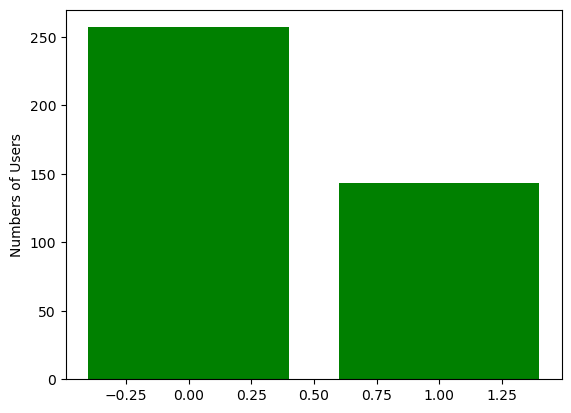

In [69]:
#visualizing how many users were in each category?

plt.bar(left_count.index.values, left_count['User ID'], color = 'green')
plt.ylabel('Numbers of Users')
plt.show()

# Feature Engineering

1.Using Age category

IGen[1-24], Millenials(24-39], GenX[40-54], BabyBoomers[55-73]

In [70]:
data['Age Category'] = ['iGen' if 0 < age < 25 else 'Millenials' if 24< age < 40 else 'GenX' if 39 < age < 55 else 'BabyBoomers' if 54 < age < 74 else None  for age in list(data['Age'].values)] 

In [71]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category
0,15624510,1,19,19000,0,iGen
1,15810944,1,35,20000,0,Millenials
2,15668575,0,26,43000,0,Millenials
3,15603246,0,27,57000,0,Millenials
4,15804002,1,19,76000,0,iGen


2.Using an income category [inter-quartile Ranges]

In [75]:
data['Income Category'] = pd.qcut(data['EstimatedSalary'],3,labels = ['Low', 'Medium', 'High'])

In [76]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category,Income Category
0,15624510,1,19,19000,0,iGen,Low
1,15810944,1,35,20000,0,Millenials,Low
2,15668575,0,26,43000,0,Millenials,Low
3,15603246,0,27,57000,0,Millenials,Medium
4,15804002,1,19,76000,0,iGen,Medium


Lets see the Visuals 

In [77]:
age_cat = data.groupby('Age Category').count()
inc_cat = data.groupby('Income Category').count()

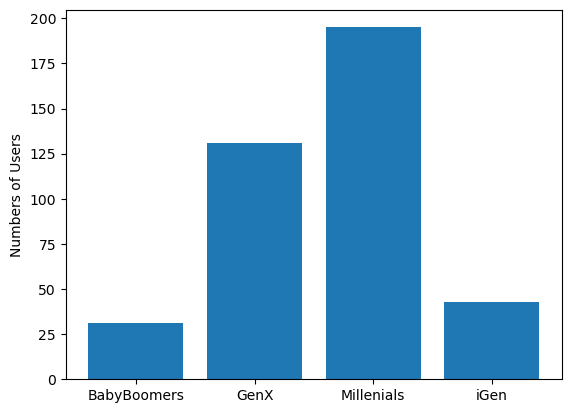

In [78]:
plt.bar(age_cat.index.values, age_cat['Age'])
plt.ylabel('Numbers of Users')

plt.show()

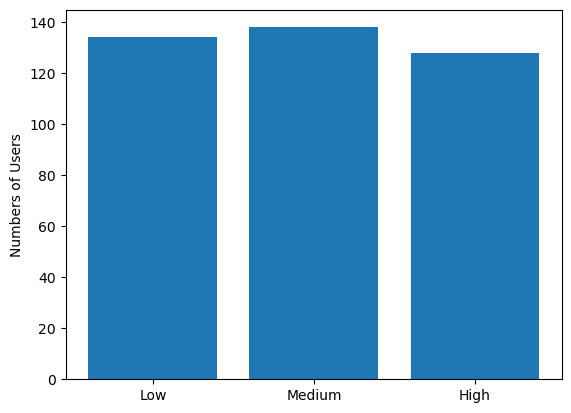

In [79]:
plt.bar(inc_cat.index.values, inc_cat['Age'])
plt.ylabel('Numbers of Users')

plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_11164\985430911.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


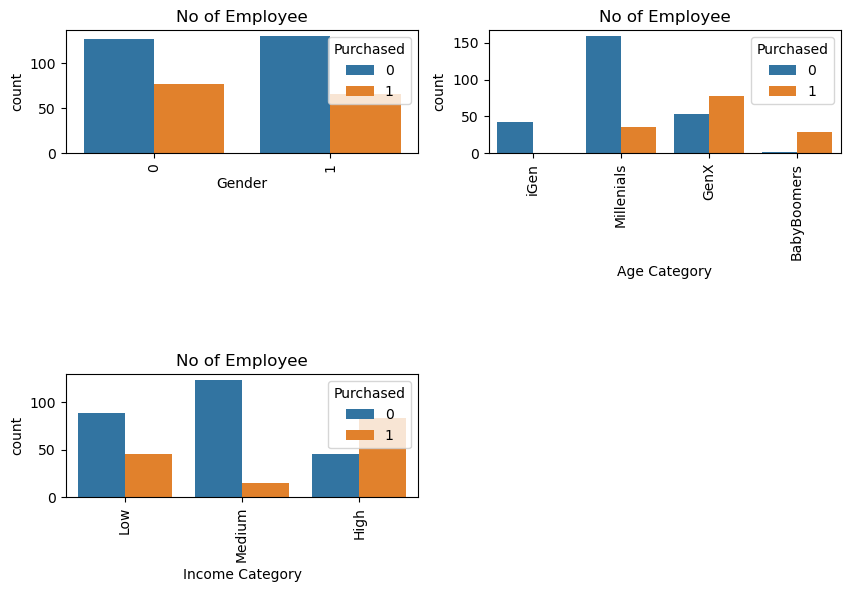

In [80]:
#whats the statistics based on those who did not make purchase

features = ['Gender', 'Age Category', 'Income Category']
fig = plt.subplots(figsize = (10,15))

for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.8)
    sns.countplot(x = j, data = data, hue = 'Purchased')
    plt.xticks(rotation = 90)
    plt.title('No of Employee')

# Model Building



In [81]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'Age Category', 'Income Category'],
      dtype='object')

## Training the Model Without the Engineered features

In [82]:
#split dat into features and target
x = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

#train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.3, random_state =42)

## Algorithm/Model 1: Naive Bayes

In [83]:
# fitting Naive Bayess to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

## Predicting

In [84]:
#predicting the Test set result
y_pred = classifier.predict(x_test)

In [85]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

## Evaluating Model Performance

In [86]:
#evaluating performance: accuracy, precision , recall
from sklearn import metrics

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))


Accuracy:  0.925
Precision:  0.975
Recall:  0.8297872340425532


In [87]:
#calculate ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc = auc (fpr, tpr)
print ('ORC AUC', roc_auc)

ORC AUC 0.9080443019527833


In [88]:
# plot confusion Matrixs
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

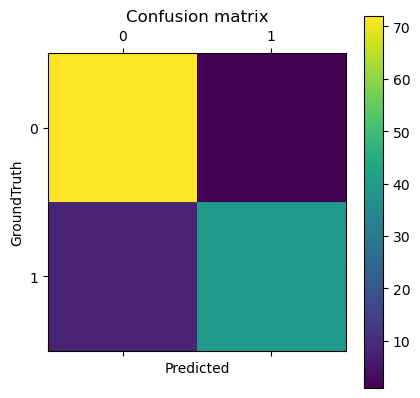

[[72  1]
 [ 8 39]]


In [89]:
conftable(y_test, y_pred, 'conf')

In [90]:
# Ground Truth
pd.Series(y_test).value_counts()

Purchased
0    73
1    47
Name: count, dtype: int64

## Training the Model With the Engineered features

In [91]:
from sklearn.preprocessing import LabelEncoder


le_E = LabelEncoder()

# Invoking fit_transform method on object
data[['Age Category', 'Income Category']] = data[['Age Category', 'Income Category']].apply(le.fit_transform)

In [92]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category,Income Category
0,15624510,1,19,19000,0,3,1
1,15810944,1,35,20000,0,2,1
2,15668575,0,26,43000,0,2,1
3,15603246,0,27,57000,0,2,2
4,15804002,1,19,76000,0,3,2


In [93]:
#split dat into features and target
x_E = data[['Gender', 'Age', 'EstimatedSalary', 'Age Category', 'Income Category']]
y_E = data['Purchased']

#train_test_split
from sklearn.model_selection import train_test_split

x_E_train, x_E_test, y_E_train, y_E_test = train_test_split (x_E,y_E,test_size=0.3, random_state =42)

In [94]:
# Algorithm/Model 1: Naive Bayes: with Engineered features
# fitting Naive Bayess to the training set
from sklearn.naive_bayes import GaussianNB

classifier_E = GaussianNB()
classifier_E.fit(x_E_train, y_E_train)

GaussianNB()

## Predicting with  Engineered features

In [95]:
#predicting the Test set result
y_E_pred = classifier_E.predict(x_E_test)

In [96]:
y_E_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

## Model Performance Evaluation with Engineered features

In [97]:
#evaluating performance: accuracy, precision , recall
from sklearn import metrics

print('Accuracy_E: ', metrics.accuracy_score(y_test, y_E_pred))
print('Precision_E: ', metrics.precision_score(y_test, y_E_pred))
print('Recall_E: ', metrics.recall_score(y_test, y_E_pred))


Accuracy_E:  0.95
Precision_E:  0.9767441860465116
Recall_E:  0.8936170212765957


In [98]:
#calculate ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve (y_E_test, y_E_pred)
roc_auc = auc (fpr, tpr)
print ('ORC AUC', roc_auc)

ORC AUC 0.9399591955698046


In [99]:
# plot confusion Matrixs
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_E_test, y_E_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix E')
    plt.colorbar()
    plt.ylabel('GroundTruth E')
    plt.xlabel('Predicted E')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

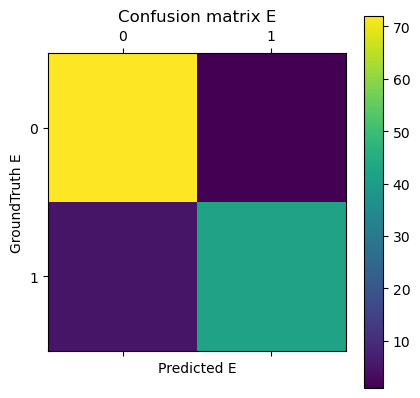

[[72  1]
 [ 5 42]]


In [100]:
conftable(y_E_test, y_E_pred, 'conf')

In [101]:
# Ground Truth
pd.Series(y_test).value_counts()


Purchased
0    73
1    47
Name: count, dtype: int64